# Linear Regression Project

An Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website. They've hired you on contract to help them figure it out! Let's get started!

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member. 


In [2]:
customers = pd.read_csv("Ecommerce Customers")

In [3]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
customers.info()
customers.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


## Exploratory Data Analysis

In [5]:
sns.set_palette("GnBu_d")
sns.set_style("whitegrid")

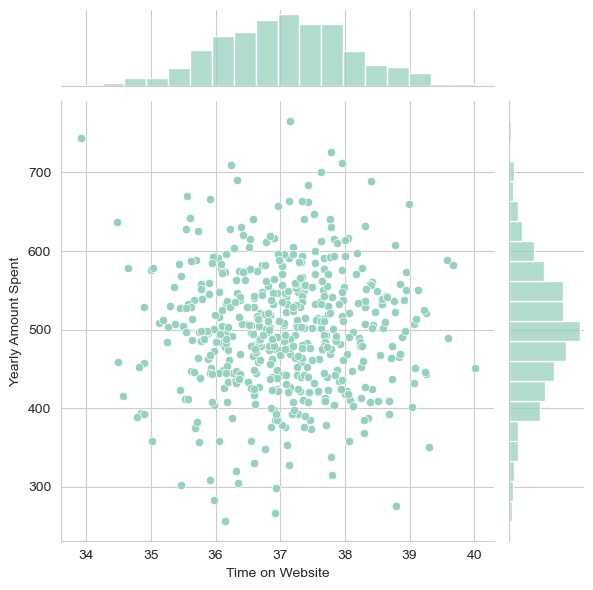

In [6]:
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=customers)

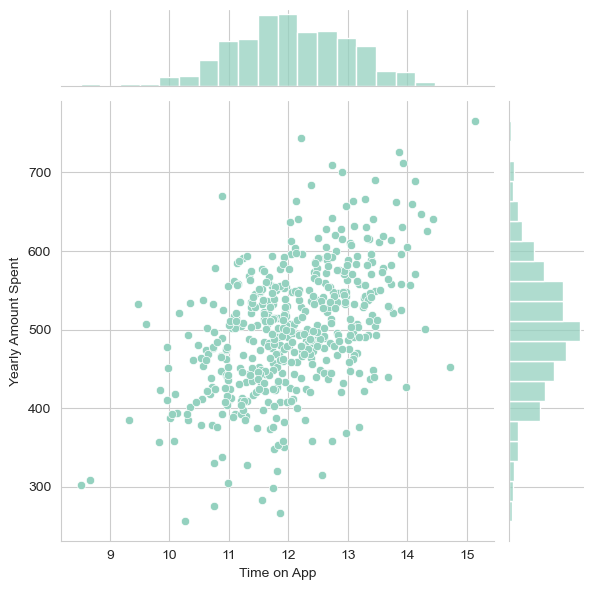

In [7]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=customers)

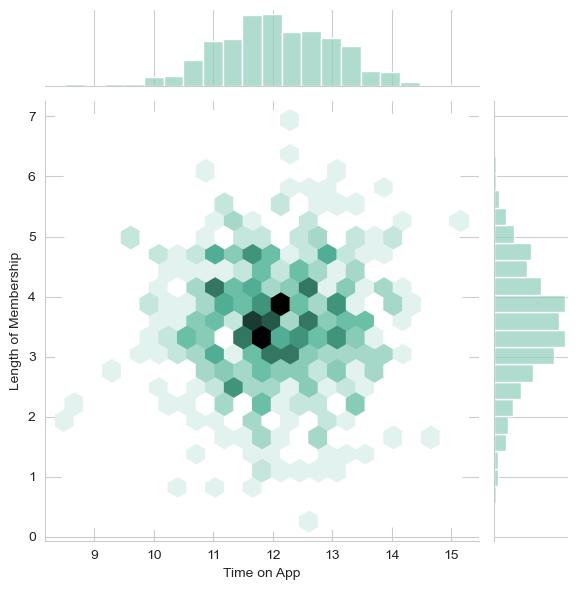

In [8]:
sns.jointplot(x='Time on App',y='Length of Membership',kind='hex',data=customers)

D:\Python\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


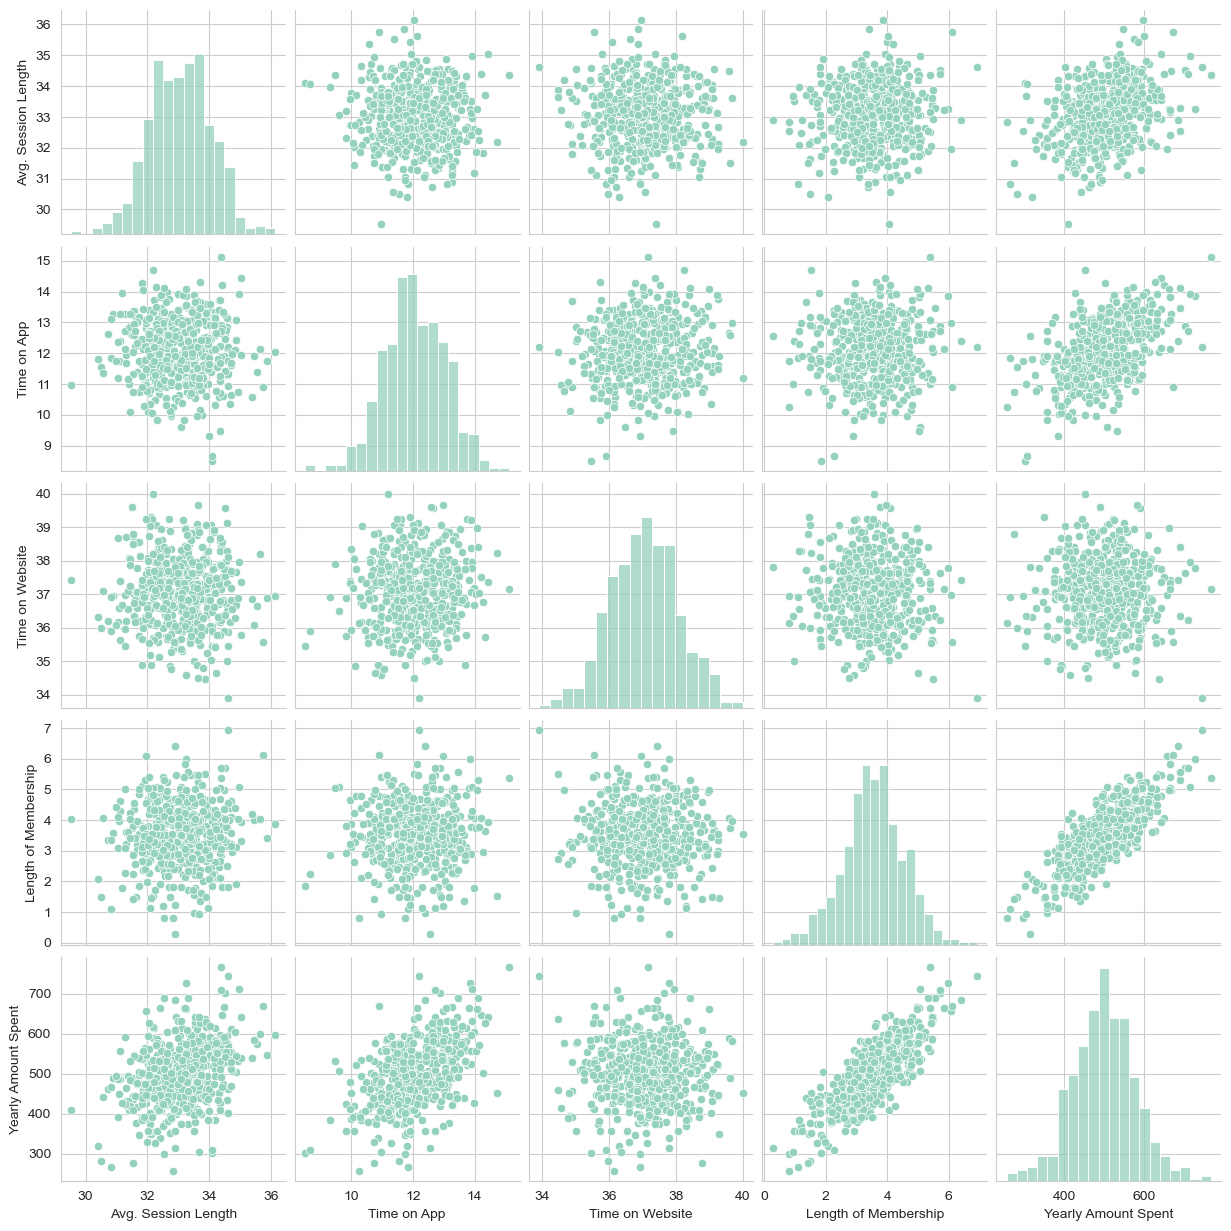

In [9]:
sns.pairplot(customers)

D:\Python\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


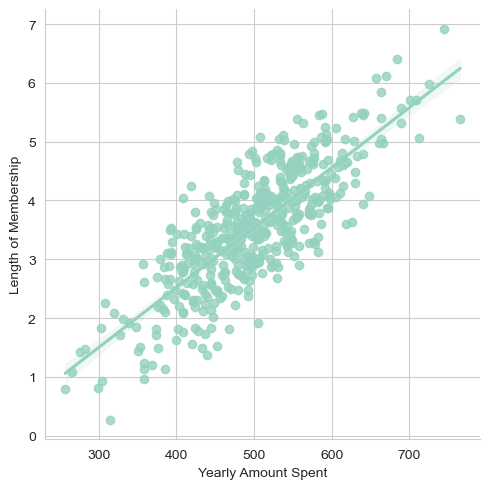

In [10]:
sns.lmplot(x='Yearly Amount Spent',y='Length of Membership',data=customers)

## Training and Testing Data

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [12]:
customers.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [13]:
X = customers[['Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership']]
y = customers['Yearly Amount Spent']

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [15]:
lm = LinearRegression()

In [16]:
lm.fit(X_train,y_train)

LinearRegression()

In [17]:
lm.coef_

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

## Predicting Test Data

In [18]:
predicted = lm.predict(X_test)

Text(0, 0.5, 'Predicted Values')

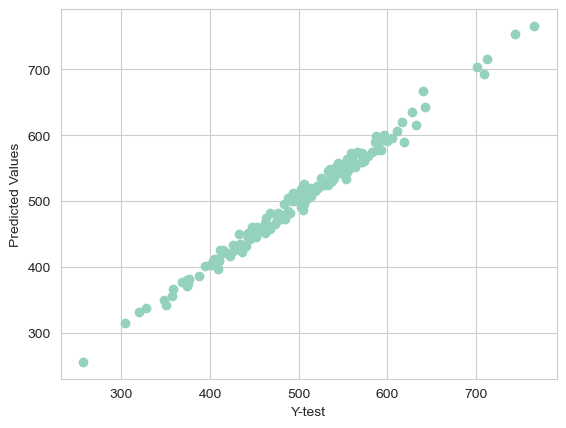

In [19]:
plt.scatter(y_test,predicted)
plt.xlabel("Y-test")
plt.ylabel("Predicted Values")

## Evaluating the Model

In [20]:
print(f'MAE: {metrics.mean_absolute_error(y_test,predicted)}')
print(f'MSE: {metrics.mean_squared_error(y_test,predicted)}')
print(f'RMSE: {np.sqrt(metrics.mean_squared_error(y_test,predicted))}')

MAE: 7.228148653430838
MSE: 79.81305165097451
RMSE: 8.933815066978637


## Residuals

C:\Users\kevin\AppData\Local\Temp\ipykernel_432\2764181326.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-predicted,bins=50)


<Axes: xlabel='Yearly Amount Spent', ylabel='Density'>

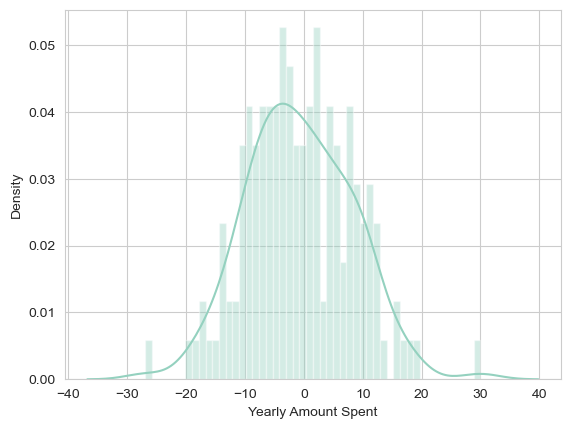

In [21]:
sns.distplot(y_test-predicted,bins=50)

## Conclusion

In [22]:
coef = pd.DataFrame(lm.coef_,X.columns,columns=["Coefficient"])

In [23]:
coef.head()

,Coefficient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097
